**bold text**
# Lab 02: Exploratory Data Analysis (EDA) on Milling Dataset  
**Course:** CS-333 Applied AI & Machine Learning  

---

## 📌 Instructions
- Perform each task under its respective section.
- Use separate cells for each step.
- Write explanations in Markdown cells.
- Ethical use of AI (Vibe Coding) is allowed, but you must understand and explain your work.


# **Name:** S.M. Ashraf Jahangir Ahmed
# **Roll Number:** ME-1927
# **Section:** SemV-ME-A

# 🔹 Task 1: Load the Dataset

In [24]:

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

# Load Dataset (Update path if needed)
url = "https://raw.githubusercontent.com/AbbasHussain72/PNEC-CS-333-Applied-AI-ML/main/labs/Lab-02_/mill.csv"
df = pd.read_csv(url)
df.head(5)  # Display first 5 data

,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,2,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,3,row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,4,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,5,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


In [25]:

# Display last 5 rows
df.tail(5)


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
175,176,row_164,16,4,NaN,4,1.50,0.50,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
176,177,row_165,16,5,0.40,6,1.50,0.50,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746
177,178,row_166,16,6,0.62,9,1.50,0.50,2,-0.380859,1.381836,0.041504,0.292969,0.075684,0.083008
178,179,row_153,14,10,1.14,24,0.75,0.50,2,0.253906,1.406250,0.083008,0.274658,0.092773,0.111084
179,180,row_154,15,1,NaN,1,1.50,0.25,2,-0.458984,1.357422,0.068359,0.292969,0.086060,0.104980


In [26]:

# Check data types
df.dtypes


,0
S.no,int64
Unnamed: 1,object
case,int64
run,int64
VB,float64
time,int64
DOC,float64
feed,float64
material,int64
smcAC,float64


In [27]:

# Check dataset shape
df.shape


(180, 15)

# 🔹 Task 2: Data Cleaning

In [28]:

# Check missing values
print(df.isnull().sum())

S.no            0
Unnamed: 1      0
case            0
run             0
VB             23
time            0
DOC             0
feed            0
material        0
smcAC           5
smcDC           1
vib_table       2
vib_spindle     4
AE_table        2
AE_spindle      1
dtype: int64


In [29]:
# Fill missing values
df = df.drop(["S.no","Unnamed: 1"], axis = 1)
print(df.isnull().sum())
# List of all columns that have missing values
df[['VB','smcAC','smcDC','vib_table','vib_spindle','AE_table','AE_spindle']] = df[['VB','smcAC','smcDC','vib_table','vib_spindle','AE_table','AE_spindle']].fillna(df[['VB','smcAC','smcDC','vib_table','vib_spindle','AE_table','AE_spindle']].mean())

# Now check again - this should show 0 for all columns
print("\nDataFrame after replacing NaN with column mean:")
print(df.isnull().sum())


case            0
run             0
VB             23
time            0
DOC             0
feed            0
material        0
smcAC           5
smcDC           1
vib_table       2
vib_spindle     4
AE_table        2
AE_spindle      1
dtype: int64

DataFrame after replacing NaN with column mean:
case           0
run            0
VB             0
time           0
DOC            0
feed           0
material       0
smcAC          0
smcDC          0
vib_table      0
vib_spindle    0
AE_table       0
AE_spindle     0
dtype: int64


### ✍️ Explain how you handled missing values here.
We fill the missing values with the mean of the numeric values of the feature where the values were missing, this method ensures that data is not lost, especially since only there are few missing values relative to the total number of samples and variance is not lost.

In [30]:

# Check duplicates
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
df.head()


number of duplicate rows:  (13, 13)


,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,1,0.000000,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,1,2,0.337006,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,1,3,0.337006,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,1,4,0.110000,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,1,5,0.337006,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


In [31]:

# Remove duplicates
# Not needed as there arent any duplicates


# 🔹 Task 3: Statistical Analysis

## 1️⃣ Center (Mean, Median, Mode)

In [32]:
# Calculate the Central Tendencies for the entire dataset
mean_val = df.mean()
median_val = df.median()
# For mode, we use .iloc[0] to pick the first mode in case of a tie
mode_val = df.mode().iloc[0]

# 3. Combine into a clean summary table
central_tendency_summary = pd.DataFrame({
    'Mean': mean_val,
    'Median': median_val,
    'Mode': mode_val
})

# 4. Display the results
print("Central Tendency Summary Table:")
print(central_tendency_summary.round(4)) # Rounded for a cleaner look



Central Tendency Summary Table:
                Mean   Median     Mode
case          8.6167  10.0000  11.0000
run           7.1167   6.0000   1.0000
VB            0.3370   0.3250   0.3370
time         25.5833  19.0000   3.0000
DOC           1.0375   0.7500   0.7500
feed          0.3722   0.2500   0.2500
material      1.3556   1.0000   1.0000
smcAC        -0.1653  -0.1653   0.2490
smcDC         1.3393   1.3721   1.3818
vib_table     0.0793   0.0684   0.0610
vib_spindle   0.2875   0.2856   0.2844
AE_table      0.1004   0.1013   0.0928
AE_spindle    0.1236   0.1218   0.1105


### ✍️ Is tool wear normally distributed? Is mean close to median?
The mean is close to median for most features, however the data does not seem to have a normal distribution from first glance.

## 2️⃣ Spread (Variation)

In [33]:

# 1. Calculate the metrics for all sensors and tool wear (VB)
sensors_list = ['VB', 'case', 'smcAC', 'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle']
sensor_df = df[sensors_list]

# Variance
variance = sensor_df.var()




In [34]:

# Range (Maximum - Minimum)
data_range = sensor_df.max() - sensor_df.min()



In [35]:

# IQR (Interquartile Range: Q3 - Q1)
Q1 = sensor_df.quantile(0.25)
Q3 = sensor_df.quantile(0.75)
iqr = Q3 - Q1

# Combine into a summary table
variability_summary = pd.DataFrame({
    'Variance': variance,
    'Range': data_range,
    'IQR': iqr
})

print("Variability Summary Table:")
print(variability_summary.sort_values(by='Variance', ascending=False))

Variability Summary Table:
              Variance      Range       IQR
case         23.075698  15.000000  9.000000
smcAC         0.120021   1.176758  0.689697
VB            0.060228   1.530000  0.270000
smcDC         0.033418   1.450195  0.041504
vib_table     0.001301   0.292969  0.021973
AE_table      0.000576   0.149536  0.021973
AE_spindle    0.000437   0.181272  0.025787
vib_spindle   0.000424   0.184326  0.021973


### ✍️ Which sensor shows highest variability?
In terms of sensors the highest variability shown  is the smAC with a variance of 0.120021.

## 3️⃣ Shape (Distribution)

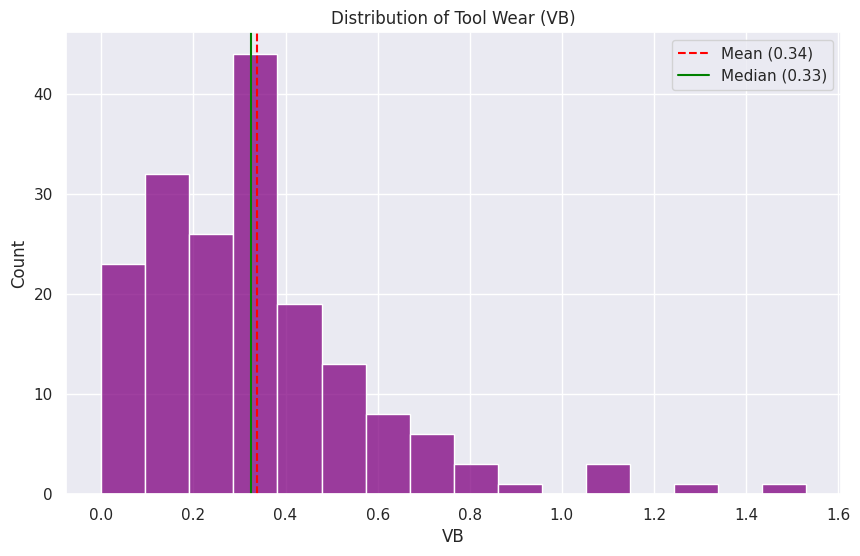

In [36]:

# 1. Pull out the specific scalar numbers for VB
vb_mean = mean_val['VB']
vb_median = median_val['VB']

# 2. Visualization
plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(df['VB'], kde=False, color='purple')

# Vertical line for Mean
plt.axvline(vb_mean, color='red', linestyle='--', label=f'Mean ({vb_mean:.2f})')

# Vertical line for Median
plt.axvline(vb_median, color='green', linestyle='-', label=f'Median ({vb_median:.2f})')

plt.title('Distribution of Tool Wear (VB)')
plt.legend()
plt.show()


/tmp/ipython-input-858841239.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


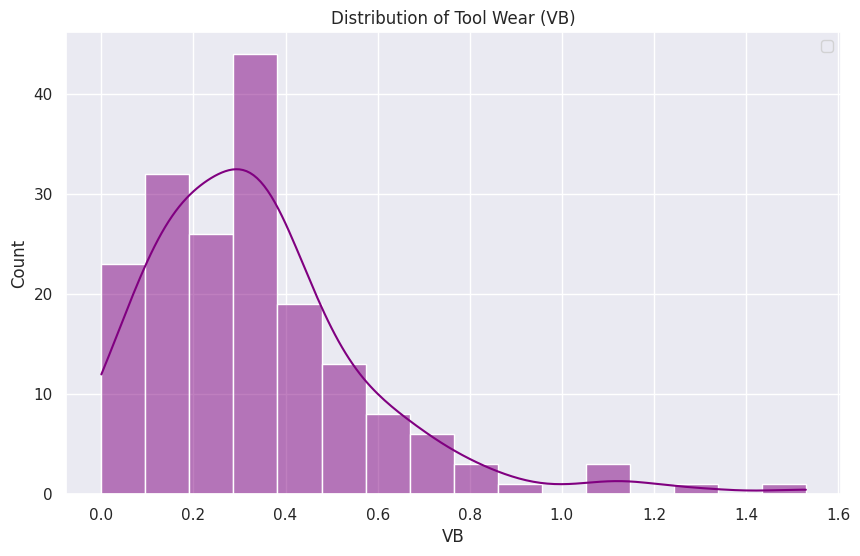

In [37]:

# KDE Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['VB'], kde=True, color='purple')
plt.title('Distribution of Tool Wear (VB)')
plt.legend()
plt.show()


### ✍️ Is distribution symmetric, skewed, or multi-modal?

The distribution is positively skewed which backs up the data from the table a few cells above which showed that the means of most parameters were greater than their medians.

## 4️⃣ Outlier Detection

<Axes: xlabel='VB'>

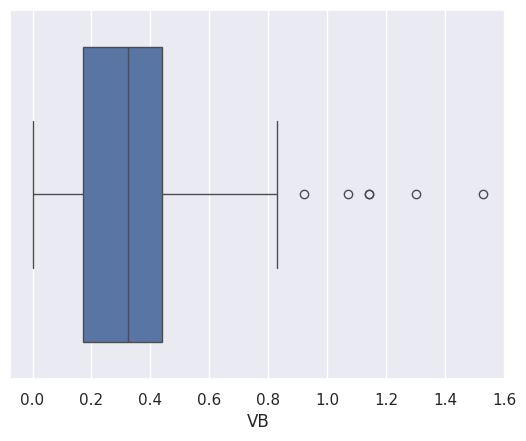

In [38]:

# Boxplot
sns.boxplot(x=df['VB'])



<Axes: xlabel='smcDC'>

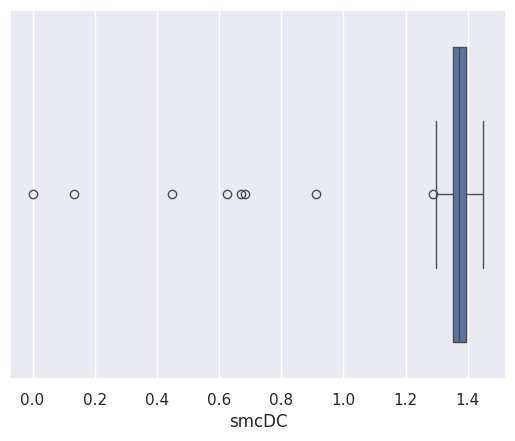

In [39]:
sns.boxplot(x=df['smcDC'])


<Axes: xlabel='smcAC'>

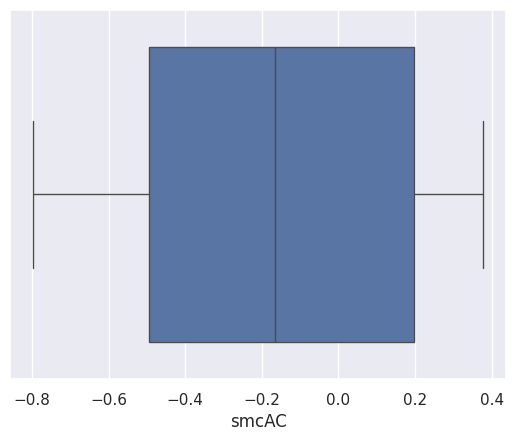

In [40]:
sns.boxplot(x=df['smcAC'])

In [41]:
#IQR, Z-modified score
# 1. IQR Calculation
Q1 = sensor_df.quantile(0.25)
Q3 = sensor_df.quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

# 2. Identify and Filter
df1 = sensor_df[~((sensor_df < (Q1 - 1.5 * IQR)) | (sensor_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"New Max VB: {df1['VB'].max():.2f}")
print(f"New Max smcDC: {df1['smcDC'].max():.2f}")

# 3. Quick comparison of Mean
print(f"VB Mean before: {sensor_df['VB'].mean():.4f}")
print(f"VB Mean after: {df1['VB'].mean():.4f}")
print(f"smcDC Mean before: {sensor_df['smcDC'].mean():.4f}")
print(f"smcDC Mean after: {df1['smcDC'].mean():.4f}")

df1.shape


New Max VB: 0.83
New Max smcDC: 1.45
VB Mean before: 0.3370
VB Mean after: 0.3255
smcDC Mean before: 1.3393
smcDC Mean after: 1.3744


(136, 8)


### ✍️
- Which method did you use (IQR or Modified Z-score)?

I used the IQR method.

- Why?

It is usually more robust for skewed data.

- How many outliers were removed?

44 outliers were removed.

- How did it affect statistics?

It greatly affected the data, for example smDC Mean went from 1.3393 to 1.3744 and VB Mean went from 0.3370 to 0.3255.

# 🔹 Task 4: Correlation Analysis

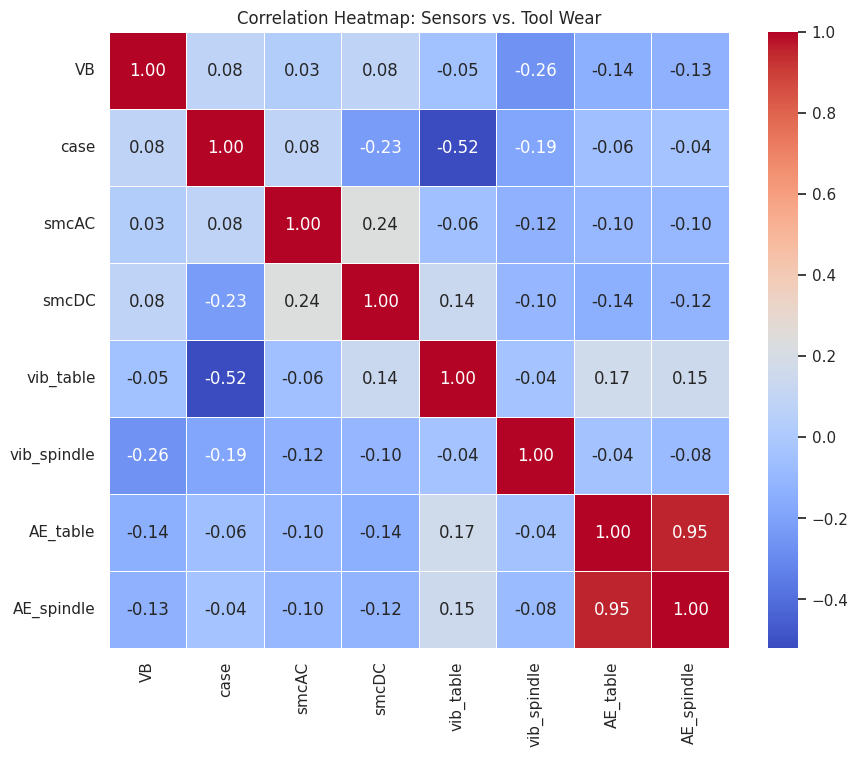

In [42]:


# Calculate the Correlation Matrix (Pearson correlation by default)
corr_matrix = df1.corr()

# Create the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap: Sensors vs. Tool Wear')
plt.show()


/tmp/ipython-input-514521115.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_ranked.index, y=corr_ranked.values, palette='viridis')


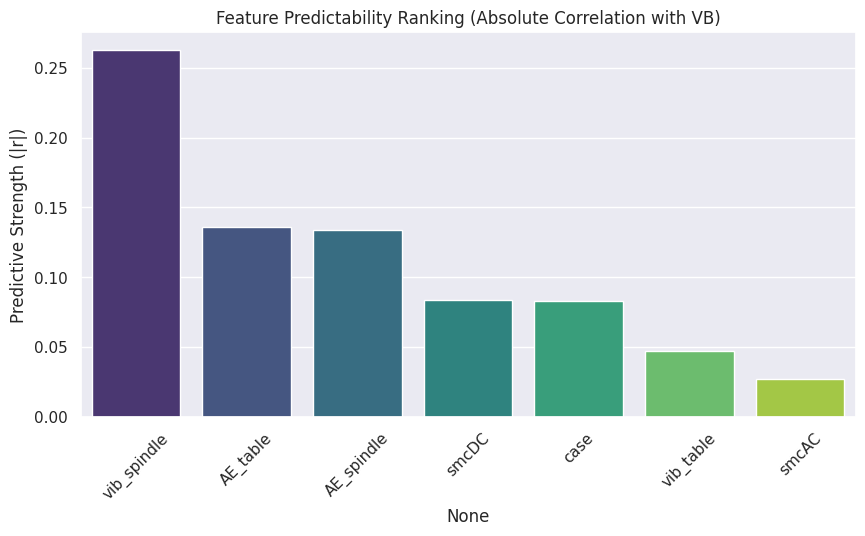

In [43]:
# 1. Calculate absolute correlation with target VB
# We use absolute values because a strong negative correlation is just as predictive as a positive one
corr_with_target = df1.corr()['VB'].drop('VB')
corr_ranked = corr_with_target.abs().sort_values(ascending=False)

# 2. Plotting the Ranking Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=corr_ranked.index, y=corr_ranked.values, palette='viridis')
plt.title('Feature Predictability Ranking (Absolute Correlation with VB)')
plt.ylabel('Predictive Strength (|r|)')
plt.xticks(rotation=45)
plt.show()




### ✍️
- Does tool wear correlate strongly with vibration?

yes, it correlates the most with vibration. It has a negative correlation as seen in the heat map.

- Which feature is most predictive?

The most predictive features for Vb are vib_spindle and AE_table.

# 🔹 Task 5: Additional Visualization

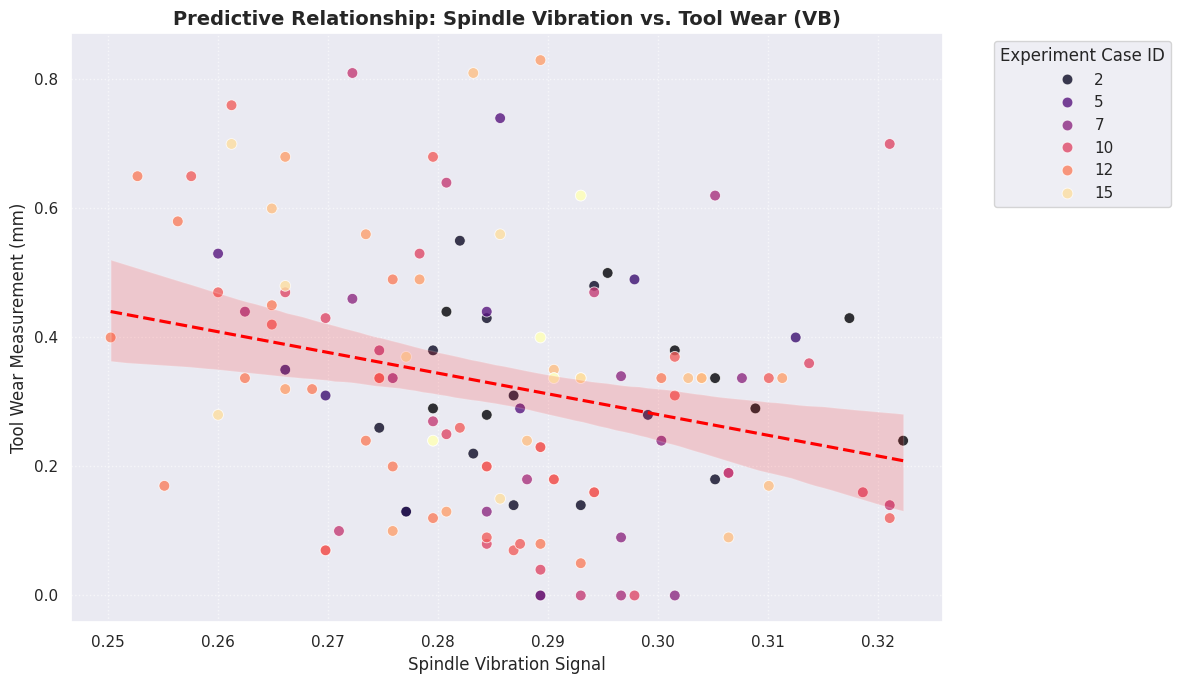

In [44]:

# Scatter Plot: Example (Tool Wear vs Vibration)

plt.figure(figsize=(12, 7))

# 'hue' colors the dots by case, 'palette' gives it the nice color gradient
sns.scatterplot(data=df1, x='vib_spindle', y='VB', hue='case', palette='magma', s=60, alpha=0.8)

# Add a trend line (regression) to show the overall path
sns.regplot(data=df1, x='vib_spindle', y='VB', scatter=False, color='red', line_kws={"linestyle":"--", "label":"Overall Trend"})

# Formatting
plt.title('Predictive Relationship: Spindle Vibration vs. Tool Wear (VB)', fontsize=14, fontweight='bold')
plt.xlabel('Spindle Vibration Signal', fontsize=12)
plt.ylabel('Tool Wear Measurement (mm)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Experiment Case ID')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()

plt.show()



#  # 🧠 Engineering Thinking Questions
1. Which parameter affects tool wear the most?

2. Which sensor signal is most stable?


3. Can tool wear be predicted from sensor data?


Answers

1. Which parameter affects tool wear the most?

Case and time would usually affect the most but they are trivial and so were ignored. Besides them the parameter vib_spindle affects tool wear the most.

2. Which sensor signal is most stable?

If stability is measured from variance, then vib_spindle is the most stable. If the range of the data is taken as a measure of stability then AE_table.

3. Can tool wear be predicted from sensor data?

While the overall trend of tool wear can be predicted from sensor data, none of the parameters showed such a high correlation that they may be used to predict accurate values.